In [454]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data = pd.read_csv(url)

In [455]:
data_pre = data.copy() #uma cópia do arquivo 
data_pre.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Achando os bairros onde as ruas não tem nome

In [456]:
is_not = data_pre['Rua']
data_ruas = data_pre[is_not.isnull()]
bairro_sem_rua = data_ruas['Bairro'].unique()
# bairro_sem_rua, onde eu encontro os bairros onde as ruas não tem nome

Retirando do arquivo os dados onde não constam Ruas

In [457]:
data_pre = data_pre[~is_not.isna()]
# data_pre agora sem os dados onde não encontramos os nomes das ruas

In [458]:
data_pre.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000


In [459]:
data_pre["Valor"].str.split(expand = True)[2].unique()
# encontramos os casos que a coluna 2 - [0],[1],[2], tem algo preenchido
# no caso sendo ou nulo, ou /mês

array([None, '/Mês'], dtype=object)

In [460]:
data_pre["Valor"].str.split(expand = False)
# lista do split após

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
4            [R$, 540.000]
5          [R$, 1.980.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 6574, dtype: object

In [461]:
len(data_pre["Valor"].str.split(expand = True)[1].unique())
# numero de valores das casas

861

In [462]:
data_pre_split = data_pre[data_pre["Valor"].str.split(expand = True)[2].isna()]
data_pre_split = data_pre_split["Valor"].str.split(expand = True)
data_pre_split.head(3)

,0,1
0,R$,7.000.000
1,R$,3.700.000
2,R$,380.000


In [463]:
#altera o valor da primeira coluna para float
data_pre_split[1] = data_pre_split[1].str.replace(".","").astype(float)

/var/folders/xc/hzpjszwj7sngpdvgtvrfd7nm0000gn/T/ipykernel_18763/4170755202.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_pre_split[1] = data_pre_split[1].str.replace(".","").astype(float)


In [464]:
data_pre[["Moeda", "Valor"]] = data_pre_split
data_pre = data_pre[~data_pre['Valor'].isna()]
data_pre = data_pre[['Rua','Bairro', 'Cidade', 'Metragem','Quartos', 'Banheiros','Vagas','Moeda','Valor']]
data_pre.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00


In [465]:
#adiciona o valor do metro quadrado aos dados da residência
data_pre["V_m2"] = data_pre["Valor"]/data_pre["Metragem"]
data_pre.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor,V_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00,3040.00


In [466]:
#média geral da soma dos inteiros e floats
data_pre_bairros = data_pre.groupby("Bairro")
data_pre_mean = data_pre_bairros.mean()
data_pre_mean.reset_index(inplace = True) #reseta o valor do index, colocando a numeração
data_pre_mean.head(3)

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor,V_m2
0,Aclimação,247.62,3.27,3.03,2.88,1766659.75,7627.47
1,Alto da Boa Vista,393.71,4.14,5.14,4.71,2304285.71,5964.93
2,Alto da Lapa,276.75,3.04,3.80,3.36,2044163.64,7957.39


In [467]:
#define o somatorio das partes dadas como inteiros ou floats
data_pre_sum = data_pre.groupby("Bairro").sum()
data_pre_sum.head(3)

,Metragem,Quartos,Banheiros,Vagas,Valor,V_m2
Bairro,,,,,,
Aclimação,19067,252,233,222,136032801.00,587315.17
Alto da Boa Vista,2756,29,36,33,16130000.00,41754.54
Alto da Lapa,15221,167,209,185,112429000.00,437656.69


In [468]:
#defino o valor do metro quadrado por bairro a partir da média das somas
data_pre_sum['V_m2'] = data_pre_sum['Valor']/data_pre_sum['Metragem']
data_pre_sum.reset_index(inplace = True) #reseta o valor do index, colocando a numeração
data_pre_sum['V_m2'].head(3)

0   7134.46
1   5852.69
2   7386.44
Name: V_m2, dtype: float64

In [469]:
#atualizei a tabela para ter os valores do m2 como o resultado da media das somas
data_pre_bairros = data_pre_bairros.mean()
data_pre_bairros.reset_index(inplace = True) #reseta o valor do index, colocando a numeração
data_pre_bairros["V_m2"] = data_pre_sum['V_m2']
data_pre_bairros.head(3)

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor,V_m2
0,Aclimação,247.62,3.27,3.03,2.88,1766659.75,7134.46
1,Alto da Boa Vista,393.71,4.14,5.14,4.71,2304285.71,5852.69
2,Alto da Lapa,276.75,3.04,3.80,3.36,2044163.64,7386.44


In [470]:
#conta a quantidade de vezes que cada bairro aparece e seleciona os 10 mais
data_bairros_more = data_pre["Bairro"].value_counts()
data_bairros_more

Alto de Pinheiros       218
Jardim Guedala          197
Brooklin Paulista       158
Vila Mariana            155
Planalto Paulista       148
                       ... 
Vila Picinin              1
Jardim Maria Augusta      1
Jardim Santa Maria        1
Parque do Castelo         1
Capela do Socorro         1
Name: Bairro, Length: 598, dtype: int64

In [471]:
#agora seleciona os 10 bairros que mais aparecem
data_pre_bairros_more = data_pre["Bairro"].value_counts()[:10].index
data_pre_bairros_more

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Brooklin Paulista',
       'Vila Mariana', 'Planalto Paulista', 'Pacaembu', 'Jardim Paulista',
       'Vila Madalena', 'Campo Belo', 'Jardim Europa'],
      dtype='object')

In [472]:
#transforma o data_pre_bairros_more na database dos top 10 bairros que mais aparecem
data_pre_more = data_pre_bairros.query("Bairro in @data_pre_bairros_more")
data_pre_more.head(3)

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor,V_m2
4,Alto de Pinheiros,431.16,3.95,4.68,4.87,4837183.10,11219.10
17,Brooklin Paulista,300.21,3.44,3.61,3.63,2095403.73,6979.82
22,Campo Belo,277.89,3.39,3.61,3.23,1923897.01,6923.29


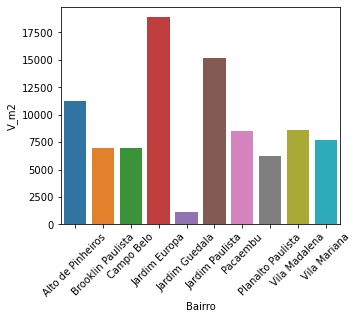

In [477]:
plt.figure(figsize=(5, 4))
ax = sns.barplot(x="Bairro", y="V_m2", data=data_pre_more)
ax.tick_params(axis='x', rotation=45)